In [1]:
import pandas as pd
import numpy as np
from class_Stastics import Stastics  # Import the class
from sklearn.datasets import load_breast_cancer

In [2]:
# Load an example dataset

dataset = load_breast_cancer(return_X_y=True, as_frame=True)

data = dataset[0]

metadata = dataset[1].to_frame().rename(columns={"target":"Condition"})

metadata["Condition"] = [ "Breast_Cancer" if i==1 else "Control" for i in  metadata.Condition]

# Create an age metadata column randomly
metadata["Age"] = (np.random.random(size=metadata.shape[0]) * 80).astype(int)

# Create an instance of the Stastics class
statist = Stastics(data, metadata)

# Show the automaticaly generated description
display(statist.adata.uns["Description_All"])

/home/german/miniforge3/envs/myenv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,Variable,Class,Count (%),Mean ± Std_dev,Median,Normal Data
0,Condition,Breast_Cancer,357 (62.74),NaN,NaN,NaN
1,Condition,Control,212 (37.26),NaN,NaN,NaN
2,Age,NaN,569 (100.0),41.3 ± 23.17,43.0,False


In [3]:

# Filter data based on metadata column (keep the young patients)
ages = statist.adata.obs.Age[ statist.adata.obs.Age < 25 ].tolist()
statist.filter(var_name="Age", subgroup=ages)


# Calculate and generate correlations
correlation_report = statist.do_correlations(
    variables_A=['Age'],
    Variables_B=statist.adata.var_names[:3],
    name="First_3_var"
)

display(correlation_report)

/home/german/Documentos/german/hospital_la_paz/proyectos/github/statistics_class/class_Stastics.py:121: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.adata.uns[f"Description_{name}"] = df_res


,Variable_1,Variable_2,Correlation,P-value,N,FDR,Significative
Correlated Variables,,,,,,,
Age vs mean radius,mean radius,Age,-0.163072,0.040635,158,0.060953,False
Age vs mean texture,mean texture,Age,-0.144362,0.070345,158,0.070345,False
Age vs mean perimeter,mean perimeter,Age,-0.167290,0.035647,158,0.060953,False


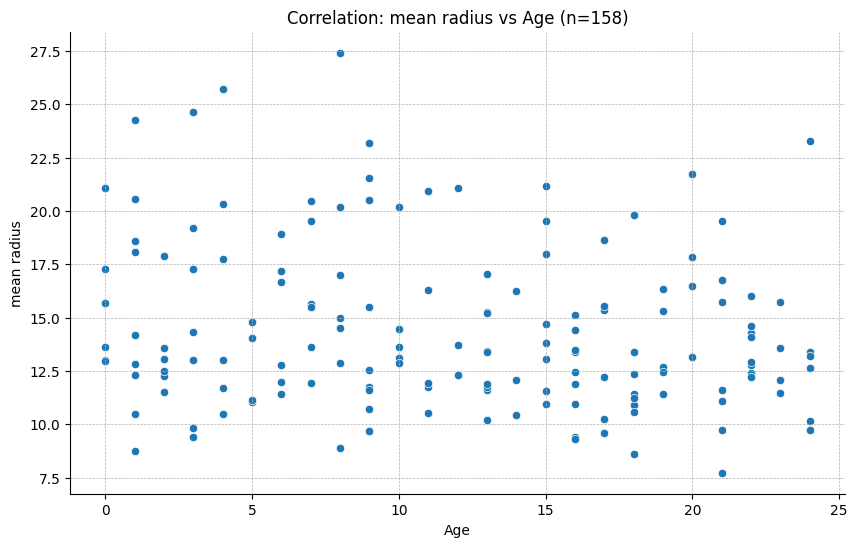

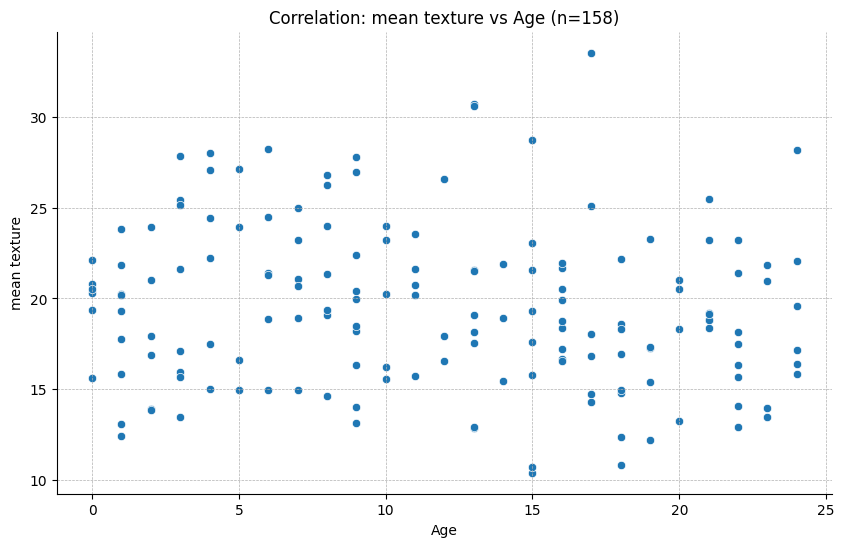

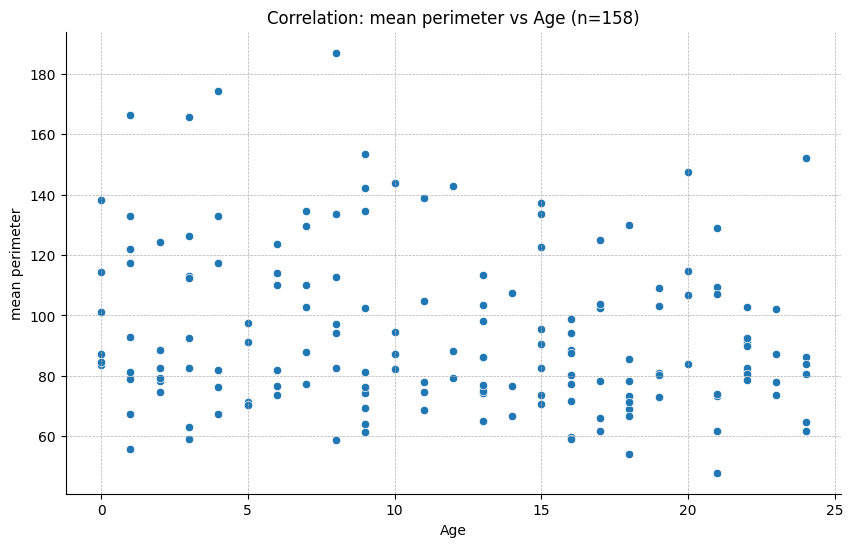

In [4]:
# Compare the condition in the first 3 variables and plot their correlation with Age 
for var in statist.adata.var_names[:3]:

    # Perform comparisons between conditions in each variable
    comparison_results = statist.comparisons_1_1(target=var, condition_name="Condition")

    # Plot correlation with age
    statist.plot_correlation(var1="Age", var2=var, show=True)




/home/german/Documentos/german/hospital_la_paz/proyectos/github/statistics_class/class_Stastics.py:617: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


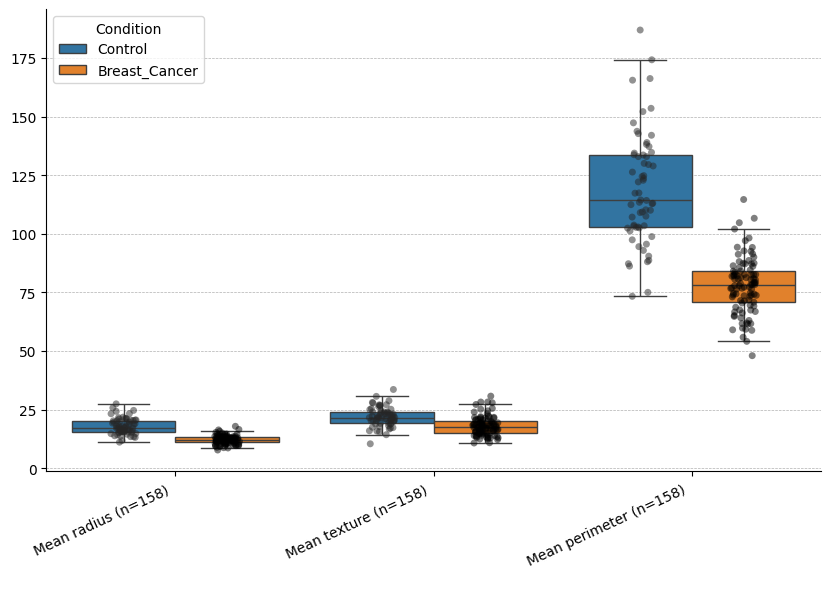

Comparison,Normal_Data,Test,P-value,Mean_Difference,Hodges_Lehmann_Estimator,N,FDR,Significant
Condition: mean radius,True,T-test,0.0,5.8069,NaN,158,7.871814e-29,True
Condition: mean texture,False,Mann-Whitney U,0.0,NaN,4.17,158,8.511227e-09,True
Condition: mean perimeter,True,T-test,0.0,41.174015,NaN,158,3.254495e-30,True


In [5]:
# Plot differences in a boxplot
statist.plot_differences(condition="Condition", vars=statist.adata.var_names[:3].tolist(), kind="Box", show=True)

display(comparison_results) # Show the report of the comparisons